In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
from general.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define Perceptron Parameter grid search function.

In [117]:
def grid_search_params():
    parameters = {'max_iter': list(range(20, 201, 10)),
            'l1_ratio': [0.0, 0.05, 0.15, 0.25],
            'penalty': [None, 'l2','l1','elasticnet'],
            'alpha': [0.0001, 0.01, 0.]
    }
    clf = LogisticRegression(fit_intercept = True, C=0.01, max_iter=350, solver='saga')
    cv = StratifiedKFold(n_splits = 3, shuffle = True)
    gridsearch = GridSearchCV(clf, parameters, n_jobs = 12, cv = cv, scoring = 'roc_auc',
                                      verbose = 2, refit = True)

    _, _, train_set, train_label = get_samples("./data/train1_icu_data.csv", "./data/train1_icu_label.csv", ret_raw = True)
    gridsearch.fit(train_set, train_label.ravel())

    print(gridsearch.best_estimator_)

Load training and testing dataset from dataset 1.

In [118]:
clf = clf = LogisticRegression(fit_intercept = True, C=0.01, max_iter=350, solver='saga')

_, _, train_set, train_label = get_samples("./data/train1_icu_data.csv", "./data/train1_icu_label.csv", ret_raw = True)
_, _, raw_test, test_labels = get_samples("./data/test1_icu_data.csv", "./data/test1_icu_label.csv", ret_raw = True)

white_train_set = data_whitening(train_set)
white_test_set = data_whitening(raw_test)

In [119]:
clf.fit(white_train_set, train_label.ravel())

train_pred = clf.predict(white_train_set)
test_pred = clf.predict(white_test_set)

After direct fitting and testing, we perform cross validation.

In [120]:
cv_score = cross_val_score(clf, white_train_set, train_label.ravel(), cv = 5)

In [121]:
train_set_acc = acc_calculate(train_pred, train_label)
test_set_acc = acc_calculate(test_pred, test_labels)

print("From dataset 1:")
print("Train set accuracy: %f, train set error rate: %f"%(train_set_acc, 1 - train_set_acc))
print("Test set accuracy: %f, test set error rate: %f"%(test_set_acc, 1 - test_set_acc))
print("Cross validation score: ", cv_score)
print(clf.coef_)

From dataset 1:
Train set accuracy: 0.796200, train set error rate: 0.203800
Test set accuracy: 0.783045, test set error rate: 0.216955
Cross validation score:  [0.782 0.781 0.811 0.783 0.771]
[[ 3.29467046e-01  3.41366256e-03 -1.59398307e-01 -3.02860263e-02
   1.46090870e-01 -5.18241526e-02  4.39285977e-02 -9.57875094e-02
   4.97491695e-02  2.37177068e-01  6.76582683e-02 -1.33494611e-01
  -2.13932869e-01 -1.35884950e-01 -2.90392702e-02  6.88165406e-02
   6.34652386e-02  6.35172710e-02  5.43031773e-02  6.56800553e-02
  -1.36229208e-01 -5.13061791e-02  3.26892136e-01  2.00201302e-01
   2.66261153e-02 -3.32722592e-02  2.09187433e-01  9.27836467e-02
  -6.41374156e-02 -1.24064713e-01  6.15944547e-02  1.07276787e-02
  -8.55382144e-02 -2.67692470e-01 -3.07162844e-02 -1.32504822e-01
   1.10356350e-01 -2.39470933e-01  5.52653741e-02 -1.72555227e-02
  -1.33216241e-01  3.02746432e-02 -1.31448908e-02 -1.28281564e-01
   7.84183466e-02  1.30426964e-01 -5.56539214e-02  4.03461442e-02
  -1.36593670e-

> Train set accuracy: 0.730600, train set error rate: 0.269400 
> Test set accuracy: 0.714676, test set error rate: 0.285324

In [122]:
_, _, train_set, train_label = get_samples("./data/train2_icu_data.csv", "./data/train2_icu_label.csv", ret_raw = True)
_, _, raw_test, test_labels = get_samples("./data/test2_icu_data.csv", "./data/test2_icu_label.csv", ret_raw = True)

white_train_set = data_whitening(train_set)
white_test_set = data_whitening(raw_test)

In [123]:
clf.fit(white_train_set, train_label.ravel())

train_pred = clf.predict(white_train_set)
test_pred = clf.predict(white_test_set)

# If we don't predict proba and use predicted labels (binary) for ROC plotting, then we will have only three points for the plot
test_pred_proba = clf.predict_proba(white_test_set)
cv_score = cross_val_score(clf, white_train_set, train_label.ravel(), cv = 5)

train_set_acc = acc_calculate(train_pred, train_label)
test_set_acc = acc_calculate(test_pred, test_labels)

print("From dataset 2:")
print("Train set accuracy: %f, train set error rate: %f"%(train_set_acc, 1 - train_set_acc))
print("Test set accuracy: %f, test set error rate: %f"%(test_set_acc, 1 - test_set_acc))
print("Cross validation score: ", cv_score)
print(clf.coef_)

From dataset 2:
Train set accuracy: 0.983051, train set error rate: 0.016949
Test set accuracy: 0.795556, test set error rate: 0.204444
Cross validation score:  [0.97966102 0.94576271 0.97627119 0.96949153 0.97966102]
[[ 0.26681795 -0.06789872 -0.06969236  0.0018973   0.2650843  -0.07083305
  -0.06015903 -0.14762796  0.0785219   0.30478733  0.10294718 -0.35609752
  -0.21696532 -0.4070388   0.07259683  0.15744375  0.03687369  0.24940427
   0.04525705  0.126334   -0.01449234 -0.10541026  0.78461429  0.12768251
  -0.04899573 -0.1489908   0.22718158  0.02585861  0.00461847 -0.16686198
   0.11147182  0.02920224 -0.00209054 -0.14106152 -0.05481532 -0.18498841
   0.09840223 -0.18092376 -0.00581048  0.01332466 -0.00966939  0.06380649
  -0.00416893 -0.04335993  0.08027083  0.15280923 -0.11641296  0.00690226
  -0.0539333   0.00764736 -0.16150656 -0.11041009 -0.00499501 -0.11676786
  -0.00799814 -0.14506748 -0.04830496 -0.08689695  0.00795633  0.06801417
  -0.00581574 -0.01417035  0.26551968 -0.0

Here I start to plot the ROC-AUC curve of Logistic regression classifier

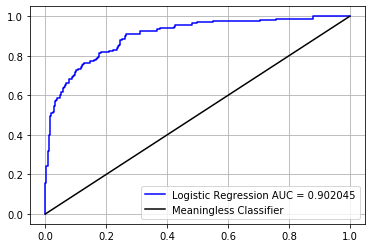

In [124]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

FP_r, TP_r, thes = roc_curve(test_labels, test_pred_proba[:, 1], drop_intermediate = False)
auc_value = auc(FP_r, TP_r)

plt.plot(FP_r, TP_r, label = 'Logistic Regression AUC = %f'%(auc_value), c = 'b')
plt.plot([0., 1.], [0., 1.], label = 'Meaningless Classifier', c = 'k')
plt.legend()
plt.grid(axis = 'both')
plt.show()